In [1]:
import numpy as np
from skimage.io import imread, imshow
from skimage.exposure import histogram

In [2]:
img = imread('../cv-node-data/output/D/74_2762_2024_11_01_09_23_32_821837_DEPTH_320_240_1.jpg')

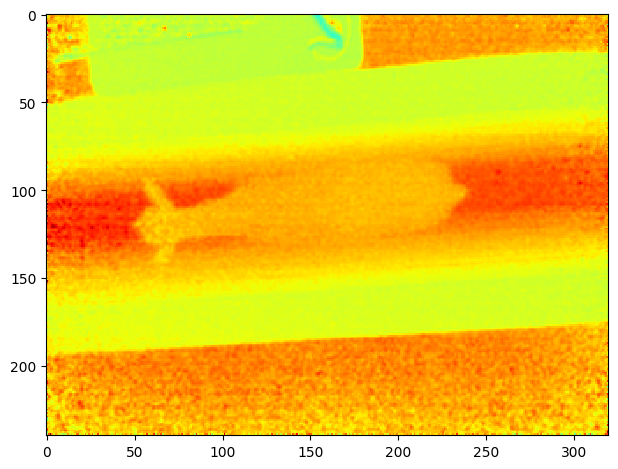

In [3]:
imshow(img, cmap='jet')

In [4]:
hist = histogram(img, nbins=256)

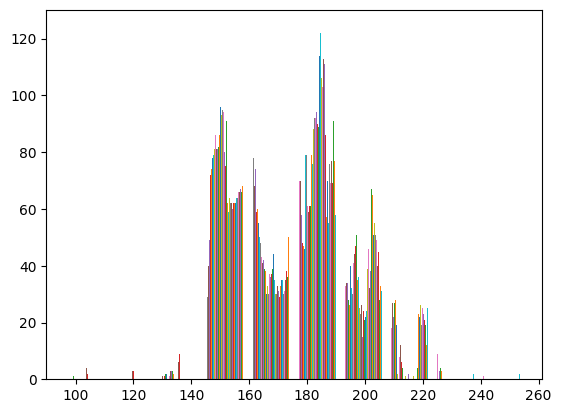

In [5]:
plt.hist(img)
plt.show() 

In [4]:
def depth_to_point_cloud(depth_image, fx, fy, cx, cy):
    height, width = depth_image.shape
    points = []

    for v in range(height):
        for u in range(width):
            Z = depth_image[v, u]
            if Z > 0:  # Ignorar pixels sem profundidade
                X = (u - cx) * (Z / fx)
                Y = (v - cy) * (Z / fy)
                points.append((X, Y, Z))

    return np.array(points)

In [5]:
# MaixSense - A075V
fx, fy, cx, cy = 230.66015625, 231.27716064453125, 166.6157989501953, 124.37689208984375
point_cloud = depth_to_point_cloud(img, fx, fy, cx, cy)
point_cloud.shape

(76800, 3)

In [ ]:
print("Testing IO for point cloud ...")
sample_pcd_data = o3d.data.PCDPointCloud()
pcd = o3d.io.read_point_cloud(sample_pcd_data.path)
print(pcd)
o3d.io.write_point_cloud("copy_of_fragment.pcd", pcd)

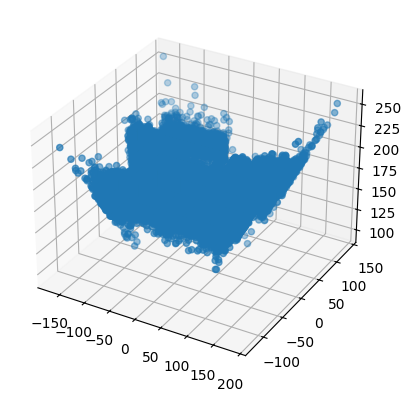

In [15]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(point_cloud[:,0], point_cloud[:,1], point_cloud[:,2])